# Data Processing

In [1]:
import json
import csv

## Task 1

In [2]:
with open('acw_user_data.csv', mode = 'r') as document:
    data = csv.reader(document, delimiter = ',')
    customer_data = list(data)   
    #The acw_user_data is read and casted to a list. 
    #This is so that I do not have to open and close the csv document in every cell that I intend to use it.

## Task 2

In [3]:
vehicle_details = []
card_details = []
Address = []
for line, items in enumerate(customer_data):
    if line == 0:
        header =items
    else:
        ind_veh ={}
        ind_crd = {}
        ind_add = {}
        ind_veh['make'] = items[header.index('Vehicle Make')]
        ind_veh['model'] = items[header.index('Vehicle Model')]
        ind_veh['year'] = items[header.index('Vehicle Year')]
        ind_veh['category'] = items[header.index('Vehicle Type')]
        ind_crd['start_date'] = items[header.index('Credit Card Start Date')]
        ind_crd['end_date'] = items[header.index('Credit Card Expiry Date')] 
        ind_crd['number'] = int(items[header.index('Credit Card Number')]) #string is casted to integer
        ind_crd['cvv'] = int(items[header.index('Credit Card CVV')])
        ind_crd['iban'] = items[header.index('Bank IBAN')]
        ind_add['street'] = items[header.index('Address Street')]
        ind_add['city'] = items[header.index('Address City')]
        ind_add['postcode'] = items[header.index('Address Postcode')]
        vehicle_details.append(ind_veh)
        card_details.append(ind_crd)
        Address.append(ind_add)

## Task 3

In [4]:
dependants = []
row_correction = []
for num, content in enumerate(customer_data):
    if num == 0:
        header1 = content
    else:
        dependants.append(content[header1.index('Dependants')])
for item in dependants:
    if item == ' 'or item == '':
        row_correction.append(dependants.index(item))
        dependants[dependants.index(item)] = 0
print(f'Problematic rows for dependants: {row_correction}')

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


##  Task 4

In [5]:
# This function is used to cast the strings 'True' and 'False' on the 'Retired' column. Using the bool() function, returns
# True for a non empty string (nkmk.me, 2020). Example, bool('True') would return True and bool('False') will also return
# True.
from distutils.util import strtobool
def string_bool (x):
    try:
        test = strtobool(x) # distutils.util.strtobool() returns 1 for the strings 'y', 'yes', 'true', 'on', '1', 
        if test == 1:       # and returns 0 for 'n', 'no', 'f', 'false', 'off', '0'. (nkmk.me, 2020)
            return True
        else:
            return False
    except ValueError as e:
        print(e)

In [6]:
processed_data = []
for line, items in enumerate(customer_data):
    if line == 0:
        header =items
    else:
        individual_data = {}
        individual_data['first_name'] = items[header.index('First Name')]
        individual_data['second_name'] = items[header.index('Last Name')]
        individual_data['age'] = int(items[header.index('Age (Years)')])
        individual_data['sex'] = items[header.index('Sex')]
        individual_data['retired'] = string_bool(items[header.index('Retired')]) #Calling the string_bool function
        individual_data['marital_status'] = items[header.index('Marital Status')]
        individual_data['dependant'] = int(dependants[line - 1])
        individual_data['salary'] = int(items[header.index('Yearly Salary (GBP)')])
        individual_data['pension'] = int(items[header.index('Yearly Pension (GBP)')])
        individual_data['company'] = items[header.index('Employer Company')]
        individual_data['commute_distance'] = float(items[header.index('Distance Commuted to Work (miles)')])
        individual_data['Vehicle'] = vehicle_details[line - 1] #The vehicle_details list index starts from 0 but line starts
        individual_data['Credit Card'] = card_details[line - 1] # from 1 on the else statement. So to get the first item in
        individual_data['Address'] = Address[line - 1]          # the list, we use [line - 1]
        processed_data.append(individual_data)
with open('processed.json', mode = 'w') as output_data:
    json.dump(processed_data, output_data)

## Task 5

In [7]:
retired_cust = []
for info in processed_data:
    if info['retired'] == True:
        retired_cust.append(info)
    else:
        pass   # pass here and in other places in the code means to 'do nothing'
employed_cust = []    
for info in processed_data:
    if info['company'] != 'N/A':
        employed_cust.append(info)
    else:
        pass
with open('retired.json', mode = 'w') as retired_cust_data:
    json.dump(retired_cust, retired_cust_data)
with open('employed.json', mode = 'w') as employed_cust_data:
    json.dump(employed_cust, employed_cust_data)

##  Task 6

In [8]:
from datetime import datetime  
def check_card(personal_data): 
    #This function takes a record from customer data and only returns same if the card is over 10 years. 
    #The function returns None if the the card is less than or equal to 10 years.
    try:
        dateformat = "%m/%y"
        end = datetime.strptime(personal_data[7], dateformat)
        start = datetime.strptime(personal_data[6], dateformat)
        if ((end - start).days)/365 > 10: #strptime returns value in days, to convert to years, we divide by 365
            return (personal_data)
    except Exception as e:
        print (e)
card_filtered = []
for line, data in enumerate(customer_data):
    if line == 0:
        card_filtered.append(data) #Appends the Header from customer_data to new list
    else:
        result = check_card(data) #check the card years
        if result != None:
            card_filtered.append(result)
removed_ccard =[]
for line, content in enumerate(card_filtered):
    #This converts the flat structure to a rich structure
    ind_removed_card ={}
    if line == 0:
        header = content
    else:
        for i in header:
            ind_removed_card[i] = content[header.index(i)] 
        removed_ccard.append(ind_removed_card)
with open('removed_ccard.json', mode = 'w') as card_removed:
    json.dump(removed_ccard, card_removed)

## Task 7

In [9]:
with open('processed.json', mode = 'r') as processed_out:
    processed_customer_data = json.load(processed_out)
for items in processed_customer_data:
    if items['commute_distance'] != 0.0: #So that we do not divide by zero
        items['salary-commute']= items['salary']/items['commute_distance']
    else:
        items['salary-commute'] = 0.0
processed_customer_data.sort(key = lambda x: x['salary-commute']) #Yesmin (2021)
with open('commute.json', mode = 'w') as sort_customer: 
    json.dump(processed_customer_data, sort_customer)

# Data Visualization

In [10]:
import pandas as pd
import seaborn as sns

## Task 1

In [11]:
customers_data = pd.read_csv('acw_user_data.csv')

In [12]:
salary = customers_data['Yearly Salary (GBP)']
Age = customers_data['Age (Years)']
print(f'The Mean customer salary is {salary.mean()}')
print(f'The mean customer age is {Age.mean()}')

The Mean customer salary is 57814.078
The mean customer age is 54.302


## Task 2

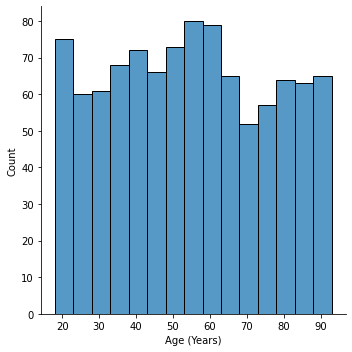

In [13]:
age_plot = sns.displot(customers_data, x = 'Age (Years)', binwidth = 5)

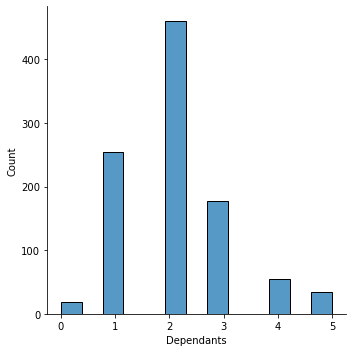

In [14]:
customers_data['Dependants'].fillna(value = 0, inplace = True) #the fillna() method checks our column and replace empty string
dependant_plot = sns.displot(customers_data, x = 'Dependants') #with 0

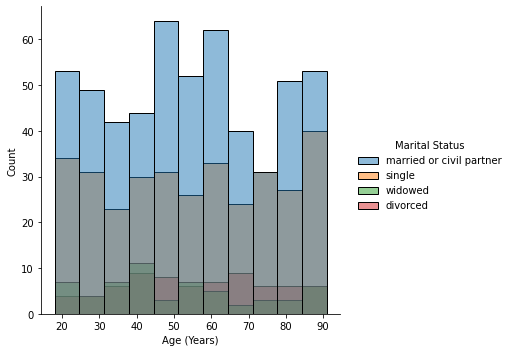

In [15]:
age_marriage = sns.displot(customers_data, x = 'Age (Years)', hue = 'Marital Status')

## Task 3

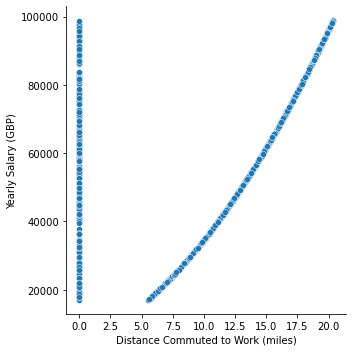

In [16]:
distance_salary =sns.relplot(customers_data, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
#The figure shows that there are some individuals who earn salary but do commute to work. Maybe working from home or retired
#but still doing some kind of work

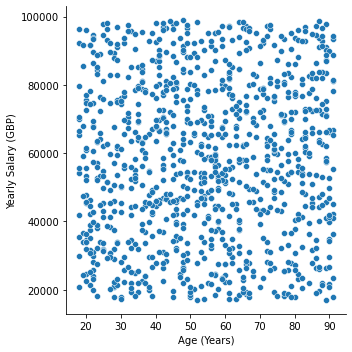

In [17]:
age_salary = sns.relplot(customers_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)')

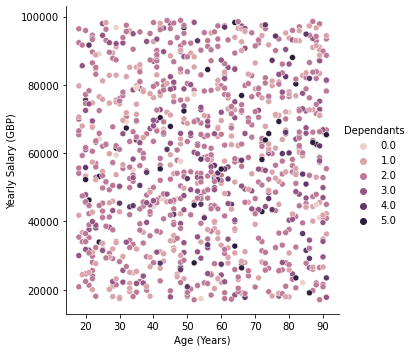

In [18]:
age_sal_dep = sns.relplot(customers_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = 'Dependants')

## Task 4

In [19]:
#we use the savefig method to save each figure in the desired and acceptable format
age_plot.savefig('age_plot.png')
dependant_plot.savefig('dependant_plot.png')
age_marriage.savefig('age_marriage.png')
distance_salary.savefig('distance_salary.png')
age_salary.savefig('age_salary.png')
age_sal_dep.savefig('age_sal_dep.png')

# References

1. Vishal(2021),'Timedelta in Python', *Pynative*, 5 December. Available at: https://pynative.com/python-timedelta/ (Accessed: 27 October 2022).
2. stackoverflow (2015), 'How to subtract dates with python', Available at: https://stackoverflow.com/questions/4863994/how-to-subtract-dates-with-python (Accessed: 27 October 2022)
3. stackoverflow (2022), 'How to extract the year from a Python datetime object?', Available at: https://stackoverflow.com/questions/1133147/how-to-extract-the-year-from-a-python-datetime-object (Assessed: 27 October 2022)
4. Nicholas Samuel (no date), 'How to Format Dates in Python', *stackabuse*, Available at: https://stackabuse.com/how-to-format-dates-in-python/ (Accessed: 28 October 2022)
5. Fahmida Yesmin (2021), 'How to sort JSON objects in Python', *linuxhint*, Available at: https://linuxhint.com/sort-json-objects-python/#:~:text=dumps()-,Using%20json.,the%20array%20of%20JSON%20objects. (Accessed: 30 October 2022)
6. stackoverflow(2022), 'Python import csv to list',Available at: https://stackoverflow.com/questions/24662571/python-import-csv-to-list. (Assessed: 1 November 2022)
7. nkmk.me(2020), 'Convert bool (True, False) and other types to each other in Python', Available at: https://note.nkmk.me/en/python-bool-true-false-usage/ (Accessed: 2 November 2022)

In [ ]:
#we use the savefig method to save each figure in the desired and acceptable format
age_plot.savefig('age_plot.png')
dependant_plot.savefig('dependant_plot.png')
age_marriage.savefig('age_marriage.png')
distance_salary.savefig('distance_salary.png')
age_salary.savefig('age_salary.png')
age_sal_dep.savefig('age_sal_dep.png')